In [44]:
##Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [45]:
##Importing dataset
dataset=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

D:\dataanalysis\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [47]:
dataset.shape

(364558, 53)

In [48]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [49]:
dataset['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [50]:
dataset['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [51]:
complaintTypecity=pd.DataFrame({'count':dataset.groupby(['Complaint Type','City']).size()}).reset_index()
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
772,Vending,STATEN ISLAND,25
773,Vending,SUNNYSIDE,15
774,Vending,WHITESTONE,1
775,Vending,WOODHAVEN,6


In [52]:
dataset.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      166
                                    In Car                        41
                                    Neglected                    951
                                    No Shelter                   165
                                    Other (complaint details)    412
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 13
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 290, dtype: int64

In [53]:
import datetime

In [69]:
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",parse_dates=["Created Date", "Closed Date"])

D:\dataanalysis\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
df["Request_Closing_Time"]=df["Closed Date"]-df["Created Date"]

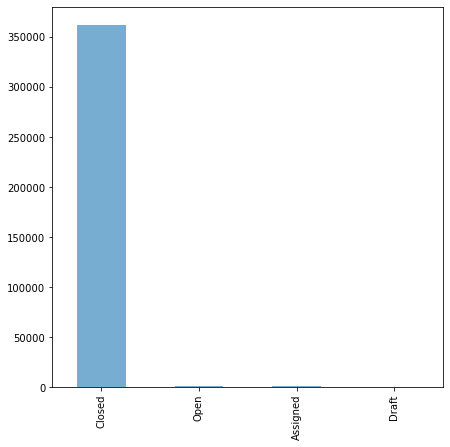

In [71]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

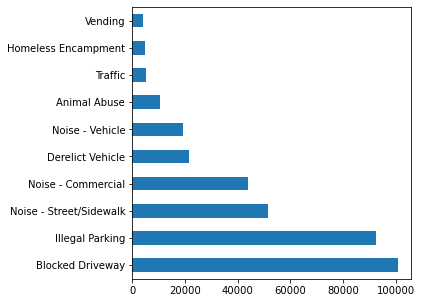

In [72]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
dataset['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(5,5));

In [73]:
dataset.groupby(["Borough","Complaint Type","Descriptor"]).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      166
                                    In Car                        41
                                    Neglected                    951
                                    No Shelter                   165
                                    Other (complaint details)    412
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 13
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 290, dtype: int64

In [74]:
majorcomplints=dataset.dropna(subset=["Complaint Type"])
majorcomplints=dataset.groupby("Complaint Type")

sortedComplaintType = majorcomplints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(10)

,Complaint Type,count
0,Blocked Driveway,100881
1,Illegal Parking,92679
2,Noise - Street/Sidewalk,51692
3,Noise - Commercial,44109
4,Derelict Vehicle,21661
5,Noise - Vehicle,19352
6,Animal Abuse,10541
7,Traffic,5198
8,Homeless Encampment,4879
9,Vending,4192


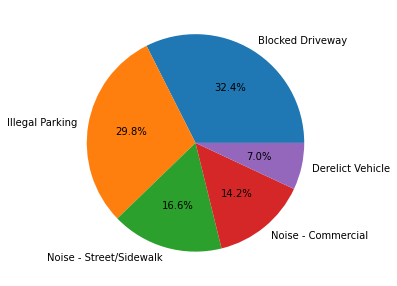

In [75]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

In [76]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = df.groupby('Complaint Type')

In [77]:
grp_data = groupedby_complainttype.get_group('Blocked Driveway')
grp_data.shape

(100881, 54)

In [78]:
#To get nan values in the entire dataset
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [79]:
#fix blank values in City column
df['City'].dropna(inplace=True)

In [80]:
#Shape after dropping nan values
df['City'].shape

(361561,)

In [81]:
#count of null values in grouped city column data
grp_data['City'].isnull().sum()

333

In [82]:
#fix those NAN with "unknown city" value instead
grp_data['City'].fillna('Unknown City', inplace =True)

D:\dataanalysis\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


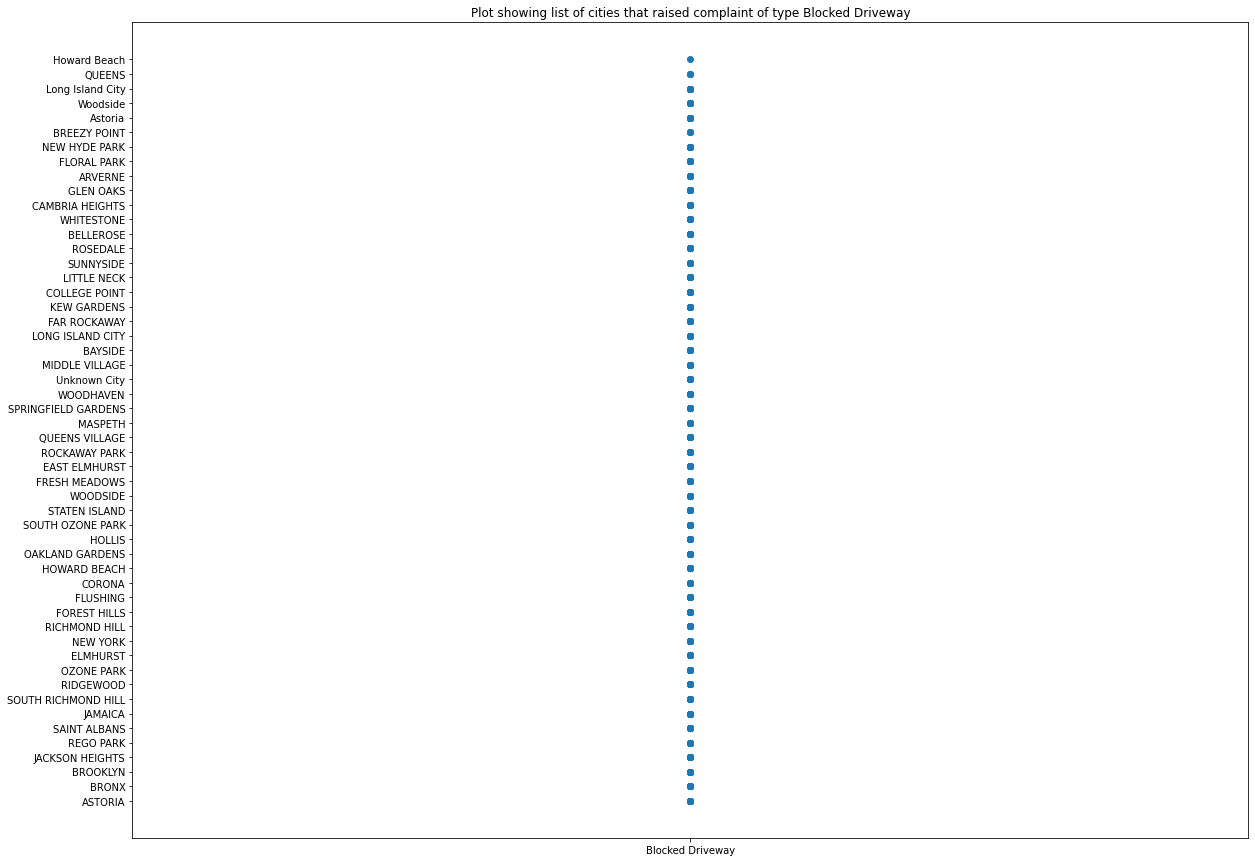

In [83]:
#Scatter plot displaying all the cities that raised complaint of type 'Blocked Driveway'
plt.figure(figsize=(20, 15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type Blocked Driveway')
plt.show()